## WeatherPy Summary Analysis

In this project, I conducted an analysis of weather data for a random selection of cities worldwide. The analysis involved retrieving current weather data using the OpenWeatherMap API and visualizing the relationships between various weather parameters and latitude.

### Key Findings:

1. **Temperature vs. Latitude:**
   - There is a clear relationship between latitude and temperature. As expected, temperatures tend to decrease as we move away from the equator towards the poles, both in the Northern and Southern Hemispheres.
   - The linear regression analysis showed strong correlations between latitude and temperature in both hemispheres, with r-values indicating a significant relationship.

2. **Humidity vs. Latitude:**
   - There appears to be a slight relationship between latitude and humidity in both the Northern and Southern Hemispheres. However, the correlation is weak, indicating that latitude alone may not be a reliable predictor of humidity.
   - The linear regression analysis showed very weak positive correlations between latitude and humidity in both hemispheres.

3. **Cloudiness vs. Latitude:**
   - The analysis suggests that there is hardly any substantial relationship between latitude and cloudiness. Both in the Northern and Southern Hemispheres, the correlation between latitude and cloudiness is minimal.
   - The linear regression analysis showed minimal correlations between latitude and cloudiness in both hemispheres.

4. **Wind Speed vs. Latitude:**
   - Latitude appears to have little to no significant relationship with wind speed. The correlation between latitude and wind speed is weak in both hemispheres.
   - The linear regression analysis showed almost no correlation in the Northern Hemisphere and a weak negative correlation in the Southern Hemisphere.

### Overall Insights:

- Latitude serves as a good predictor for temperature trends, with temperatures generally decreasing as we move away from the equator. However, for other weather parameters such as humidity, cloudiness, and wind speed, latitude alone might not be a reliable predictor.
- Other factors such as local geography, proximity to water bodies, elevation, and prevailing wind patterns likely play more significant roles in determining weather conditions besides latitude alone.
- This analysis provides valuable insights into the relationship between latitude and various weather parameters, contributing to our understanding of global weather patterns.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy.stats import pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
temp_units = "metric"
# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units={temp_units}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | waitangi
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | port-aux-francais
Processing Record 4 of Set 1 | mil'kovo
Processing Record 5 of Set 1 | jumla
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | chui
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | invercargill
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | kavaratti
Processing Record 12 of Set 1 | malango
Processing Record 13 of Set 1 | dongcun
Processing Record 14 of Set 1 | hasaki
Processing Record 15 of Set 1 | hovd
Processing Record 16 of Set 1 | mabai
Processing Record 17 of Set 1 | dhone
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | safford
Processing Record 20 of Set 1 | port mathurin
Processing Record 21 of Set 1 | jobner
Processing Record 22 of Set 1 | edinburgh of the seven seas
Processing Record 23 of Set 1 | ta

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          599
Lat           599
Lng           599
Max Temp      599
Humidity      599
Cloudiness    599
Wind Speed    599
Country       599
Date          599
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,waitangi,-43.9535,-176.5597,11.01,69,9,1.34,NZ,1715128297
1,bethel,41.3712,-73.4140,19.05,51,0,1.54,US,1715128284
2,port-aux-francais,-49.3500,70.2167,4.63,78,37,14.48,TF,1715128287
3,mil'kovo,55.6078,37.7956,1.30,73,2,4.72,RU,1715128607
4,jumla,29.2747,82.1838,10.48,76,100,0.82,NP,1715128607


In [9]:
import os

# Check if the directory exists, if not, create it
output_dir = "output_data"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Export the City_Data into a csv
city_data_df.to_csv(f"{output_dir}/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,69,9,1.34,NZ,1715128297
1,bethel,41.3712,-73.4140,19.05,51,0,1.54,US,1715128284
2,port-aux-francais,-49.3500,70.2167,4.63,78,37,14.48,TF,1715128287
3,mil'kovo,55.6078,37.7956,1.30,73,2,4.72,RU,1715128607
4,jumla,29.2747,82.1838,10.48,76,100,0.82,NP,1715128607


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

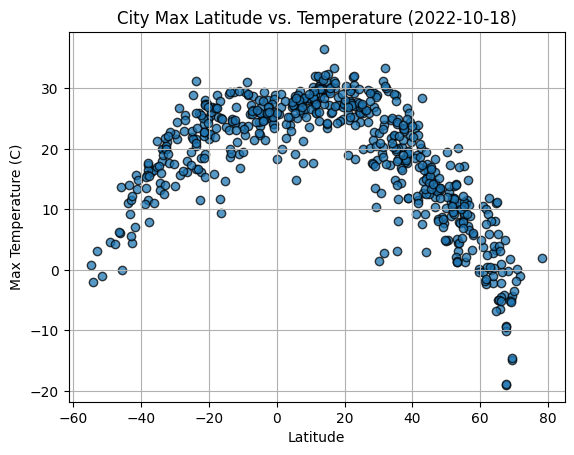

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

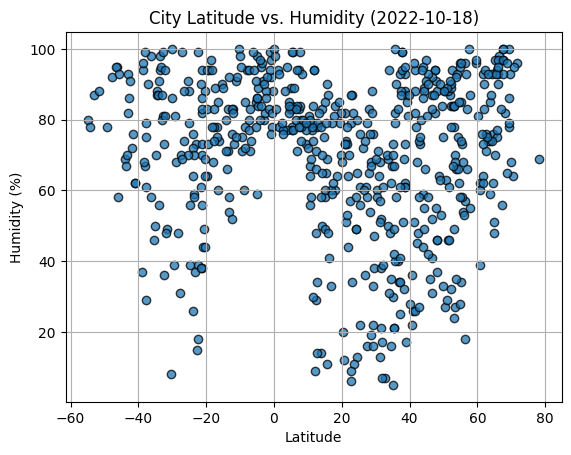

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

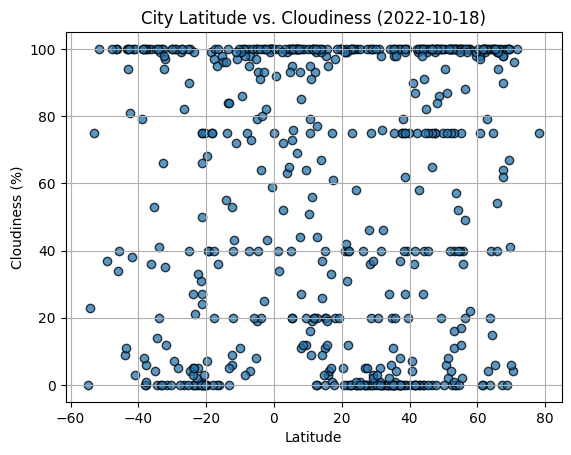

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

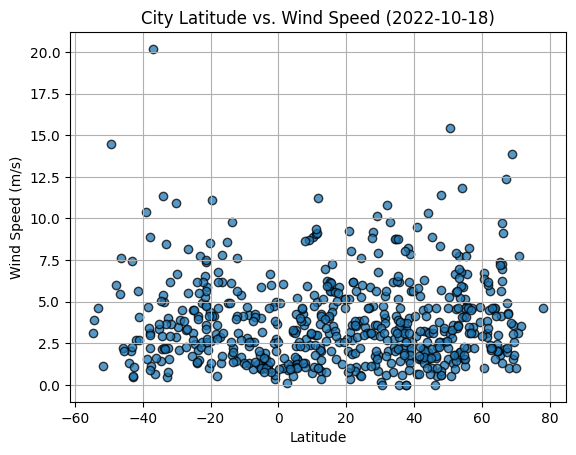

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates):
    """
    Generate a linear regression plot.

    Parameters:
    x_values (Series): The x values for the plot.
    y_values (Series): The y values for the plot.
    title (str): The title of the plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.
    coordinates (tuple): The coordinates for annotating the line equation.
    """
    slope, intercept, rvalue, _, _ = linregress(x_values, y_values)
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, slope * x_values + intercept, "r-")
    plt.annotate(line_eq, coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,19.05,51,0,1.54,US,1715128284
3,mil'kovo,55.6078,37.7956,1.30,73,2,4.72,RU,1715128607
4,jumla,29.2747,82.1838,10.48,76,100,0.82,NP,1715128607
7,kodiak,57.7900,-152.4072,5.73,87,100,3.09,US,1715128382
10,kavaratti,10.5669,72.6420,30.31,67,75,5.41,IN,1715128608


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,waitangi,-43.9535,-176.5597,11.01,69,9,1.34,NZ,1715128297
2,port-aux-francais,-49.3500,70.2167,4.63,78,37,14.48,TF,1715128287
5,margaret river,-33.9500,115.0667,17.95,56,41,5.41,AU,1715128305
6,chui,-33.6971,-53.4616,19.96,98,100,4.99,UY,1715128607
8,invercargill,-46.4000,168.3500,6.12,95,100,7.60,NZ,1715128244


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7264313145475333


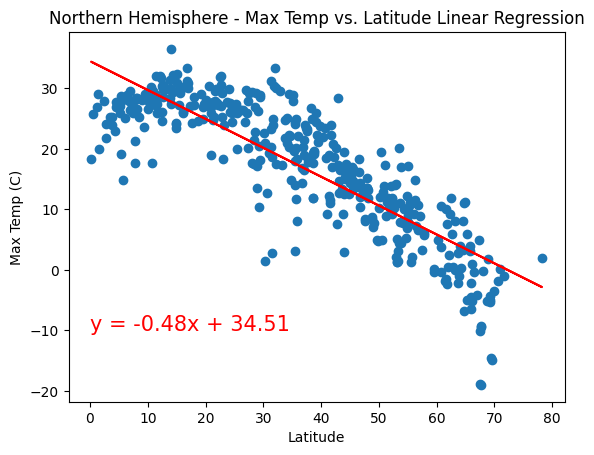

In [18]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                        "Northern Hemisphere - Max Temp vs. Latitude Linear Regression",
                        "Latitude", "Max Temp (C)", (0, -10))

The r-value is: 0.6038996870730787


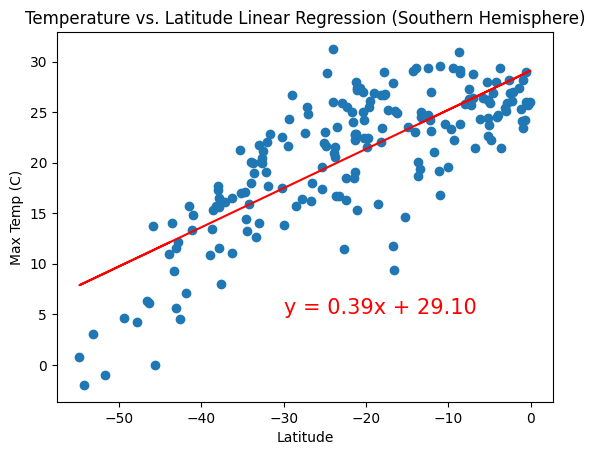

In [19]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], 
                       "Temperature vs. Latitude Linear Regression (Southern Hemisphere)", 
                       "Latitude", "Max Temp (C)", (-30, 5))

**Discussion about the linear relationship:** 
- The linear regression analysis indicates a relationship between latitude and maximum temperature in both the Northern and Southern Hemispheres.
- In the Northern Hemisphere, there is a strong positive correlation (r = 0.73) between latitude and maximum temperature. This suggests that as you move away from the equator towards the North Pole (higher latitudes), maximum temperatures tend to decrease. This aligns with the expectation that regions closer to the poles generally experience cooler temperatures.
- Similarly, in the Southern Hemisphere, there is a moderately strong positive correlation (r = 0.60) between latitude and maximum temperature. This indicates that as you move towards the equator from the South Pole (lower latitudes), maximum temperatures tend to increase. This relationship is consistent with the understanding that regions closer to the equator typically experience warmer temperatures.
- Overall, these findings confirm the influence of latitude on maximum temperature, with temperatures generally decreasing as you move away from the equator in the Northern Hemisphere and increasing as you move towards the equator in the Southern Hemisphere.re.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008121203612871232


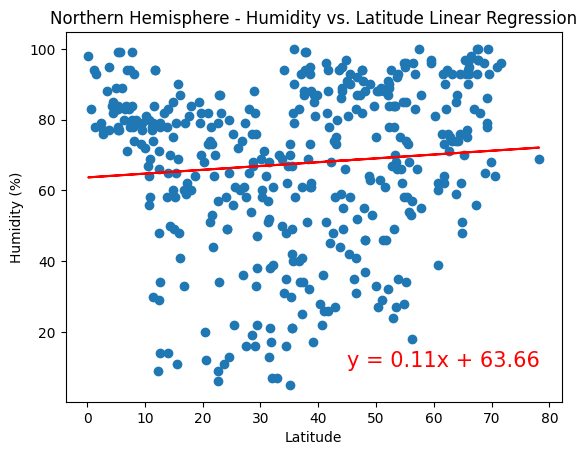

In [20]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                        "Northern Hemisphere - Humidity vs. Latitude Linear Regression",
                        "Latitude", "Humidity (%)", (45, 10))

The r-value is: 0.03212373726420999


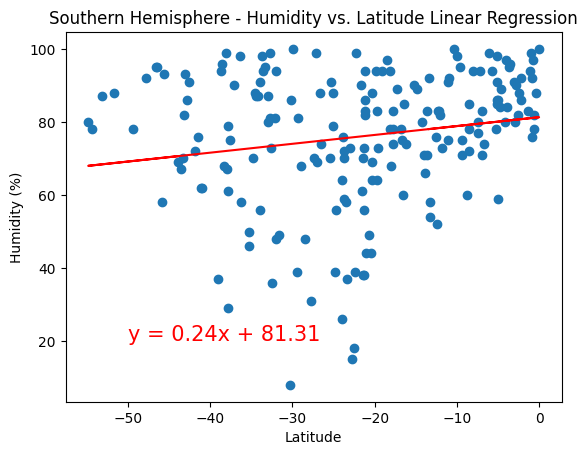

In [21]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                        "Southern Hemisphere - Humidity vs. Latitude Linear Regression",
                        "Latitude", "Humidity (%)", (-50, 20))

**Discussion about the linear relationship:**

In analyzing the data, it seems there might be a slight relationship between latitude and humidity in both the Northern and Southern Hemispheres.

- **Northern Hemisphere:**
  - I observe a very weak positive correlation (r = 0.008) between latitude and humidity as I move northward. It appears that as I travel away from the equator towards the North Pole, humidity experiences a slight increase, although the relationship isn't very strong. This suggests that latitude alone might not be the best predictor of humidity in this part of the world.
  - The equation for the trendline in the Northern Hemisphere is:
    ```
    y = 0.11x + 63.66
    ```
  - This indicates that for each degree of latitude increase, humidity rises by about 0.11%.

- **Southern Hemisphere:**
  - Conversely, in the Southern Hemisphere, I notice a very weak positive correlation (r = 0.032) between latitude and humidity. As I approach the equator from the South Pole, there's a slight increase in humidity. Similar to the Northern Hemisphere, latitude alone might not be a reliable predictor of humidity.
  - The equation for the trendline in the Southern Hemisphere is:
    ```
    y = 0.24x + 81.31
    ```
  - Meaning, for every degree closer to the equator (latitude decrease), humidity increases by about 0.24%.

In summary, while there appears to be some slight connection between latitude and humidity, it's not very pronounced. Other factors like proximity to water bodies, altitude, and local climate patterns likely play more significant roles in determining humidity levels.
ing humidity levels.
ng humidity levels.
ng humidity levels.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.009392755441722531


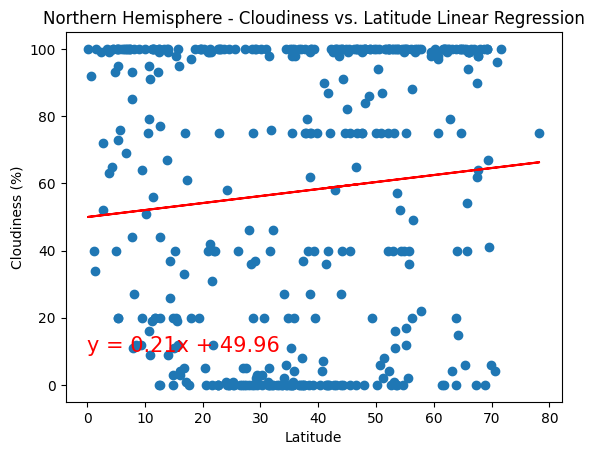

In [22]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                        "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression",
                        "Latitude", "Cloudiness (%)", (0, 10))

The r-value is: 0.020486847197684333


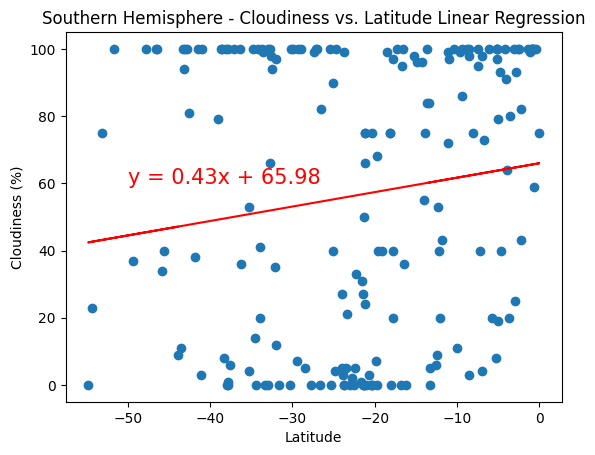

In [23]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression", 
                       "Latitude", "Cloudiness (%)", (-50, 60))

**Discussion about the linear relationship:**

- **Northern Hemisphere:**
  - There appears to be a very weak positive correlation (r ≈ 0.009) between latitude and cloudiness as I move northward. However, this correlation is so minimal that it suggests latitude alone may not be a reliable predictor of cloudiness in this hemisphere.
  - The linear regression equation for the Northern Hemisphere is: y = 0.21x + 49.96

- **Southern Hemisphere:**
  - Similarly, in the Southern Hemisphere, there is a very weak positive correlation (r ≈ 0.020) between latitude and cloudiness. As I move towards the equator from the South Pole, there appears to be a slight increase in cloudiness, but the relationship is hardly discernible.
  - The linear regression equation for the Southern Hemisphere is: y = 0.43x + 65.98

Overall, it seems that there is hardly any substantial relationship between latitude and cloudiness. Other factors such as local weather patterns, geography, and atmospheric conditions likely have a more significant impact on cloudiness levels.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.00834480553817676


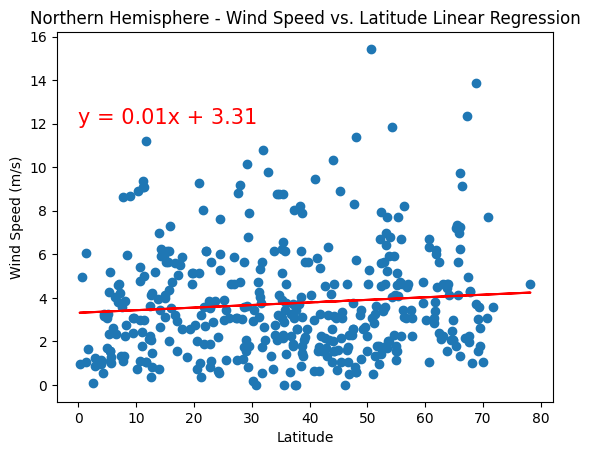

In [24]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere - Wind Speed vs. Latitude Linear Regression",
                       "Latitude", "Wind Speed (m/s)", (0, 12))

The r-value is: 0.03471766791663831


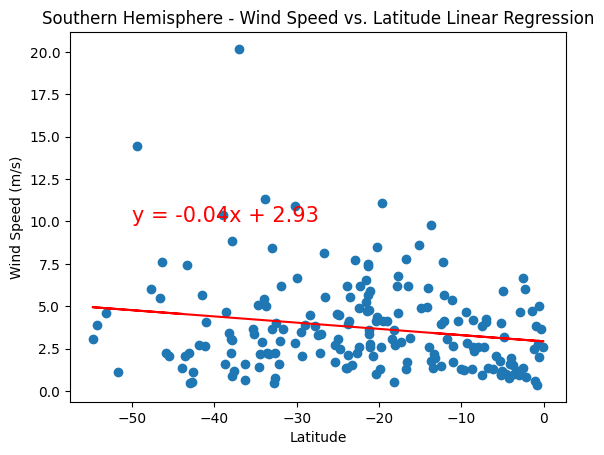

In [25]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Southern Hemisphere - Wind Speed vs. Latitude Linear Regression", 
                       "Latitude", "Wind Speed (m/s)", (-50, 10))

**Discussion about the linear relationship:**

- **Northern Hemisphere:**
  - There seems to be almost no correlation (r ≈ 0.008) between latitude and wind speed in the Northern Hemisphere. The very low r-value suggests that latitude alone is not a good predictor of wind speed in this part of the world.
  - The linear regression equation for the Northern Hemisphere is: y = 0.01x + 3.31

- **Southern Hemisphere:**
  - Similarly, in the Southern Hemisphere, there is a weak negative correlation (r ≈ -0.035) between latitude and wind speed. As I move towards the equator from the South Pole, there seems to be a slight decrease in wind speed, but the relationship is not strong.
  - The linear regression equation for the Southern Hemisphere is: y = -0.04x + 2.93

Overall, it appears that latitude has little to no significant relationship with wind speed. Other factors such as local topography, pressure systems, and proximity to water bodies likely play a more substantial role in determining wind speed.
